# Customer Churn Prediction Analysis
## Week 2: Advanced Methods for Predictive Modelling

### 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

### 2. Load Data and Drop Column

In [2]:
# Load the dataset
df = pd.read_csv('features_anon.csv')

# Drop the Avg_Spend_Last_90 column
df = df.drop('Avg_Spend_Last_90', axis=1)

print(f"Dataset shape after dropping column: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape after dropping column: (7372, 15)
Columns: ['Recency', 'Frequency', 'AIT', 'Average Order Value', 'is_using_app', 'has_acc_manager', 'Cross_category_Count', 'Spending_Velocity', 'probability_alive', 'T', 'churn_label', 'price_group', 'item_category', 'Monetary', 'Is_credit_limit']


### 3. Eyeballing and Understanding the Data

In [3]:
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())
print("\nTarget variable distribution:")
print(df['churn_label'].value_counts())
print("\nChurn rate:", df['churn_label'].mean())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7372 entries, 0 to 7371
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recency               7372 non-null   int64  
 1   Frequency             7372 non-null   int64  
 2   AIT                   7372 non-null   float64
 3   Average Order Value   7372 non-null   float64
 4   is_using_app          7372 non-null   object 
 5   has_acc_manager       7372 non-null   object 
 6   Cross_category_Count  7372 non-null   int64  
 7   Spending_Velocity     7372 non-null   float64
 8   probability_alive     7372 non-null   float64
 9   T                     7372 non-null   float64
 10  churn_label           7372 non-null   int64  
 11  price_group           7372 non-null   object 
 12  item_category         7372 non-null   object 
 13  Monetary              7372 non-null   float64
 14  Is_credit_limit       7372 non-null   int64  
dtypes: floa

### 4. Data Cleaning Pipeline

In [4]:
# Separate features and target
X = df.drop('churn_label', axis=1)
y = df['churn_label']

# Encode categorical variables
categorical_features = ['is_using_app', 'has_acc_manager', 'price_group', 'item_category']
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Data cleaning completed!")

Data cleaning completed!


### 5. Train-Test Split

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set churn rate: {y_train.mean():.3f}")
print(f"Test set churn rate: {y_test.mean():.3f}")

Training set shape: (5897, 14)
Test set shape: (1475, 14)
Training set churn rate: 0.570
Test set churn rate: 0.570


### 6. Base Models Training and Evaluation

In [6]:
# Define base models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize results storage
results = []

# Train and evaluate each model
for name, model in base_models.items():
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics (focus on churn class - label 1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Store results
    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"{name} - Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

print("\nAll models trained successfully!")

Training Logistic Regression...
Logistic Regression - Precision: 0.793, Recall: 0.831, F1-Score: 0.812
Training Random Forest...
Random Forest - Precision: 0.786, Recall: 0.839, F1-Score: 0.812
Training Gradient Boosting...
Gradient Boosting - Precision: 0.789, Recall: 0.842, F1-Score: 0.815
Training SVM...
SVM - Precision: 0.785, Recall: 0.847, F1-Score: 0.815
Training KNN...
KNN - Precision: 0.774, Recall: 0.793, F1-Score: 0.783
Training Naive Bayes...
Naive Bayes - Precision: 0.700, Recall: 0.894, F1-Score: 0.785

All models trained successfully!


### 7. Results Comparison Table

In [7]:
# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(3)
results_df = results_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison (Focus on Churn - Label 1):")
print("=" * 60)
print(results_df.to_string(index=False))

# Find best performing model
best_model = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1-Score']
print(f"\nBest performing model: {best_model} (F1-Score: {best_f1})")

Model Performance Comparison (Focus on Churn - Label 1):
              Model  Precision  Recall  F1-Score
  Gradient Boosting      0.789   0.842     0.815
                SVM      0.785   0.847     0.815
Logistic Regression      0.793   0.831     0.812
      Random Forest      0.786   0.839     0.812
        Naive Bayes      0.700   0.894     0.785
                KNN      0.774   0.793     0.783

Best performing model: Gradient Boosting (F1-Score: 0.815)


### 8. Visualization of Results

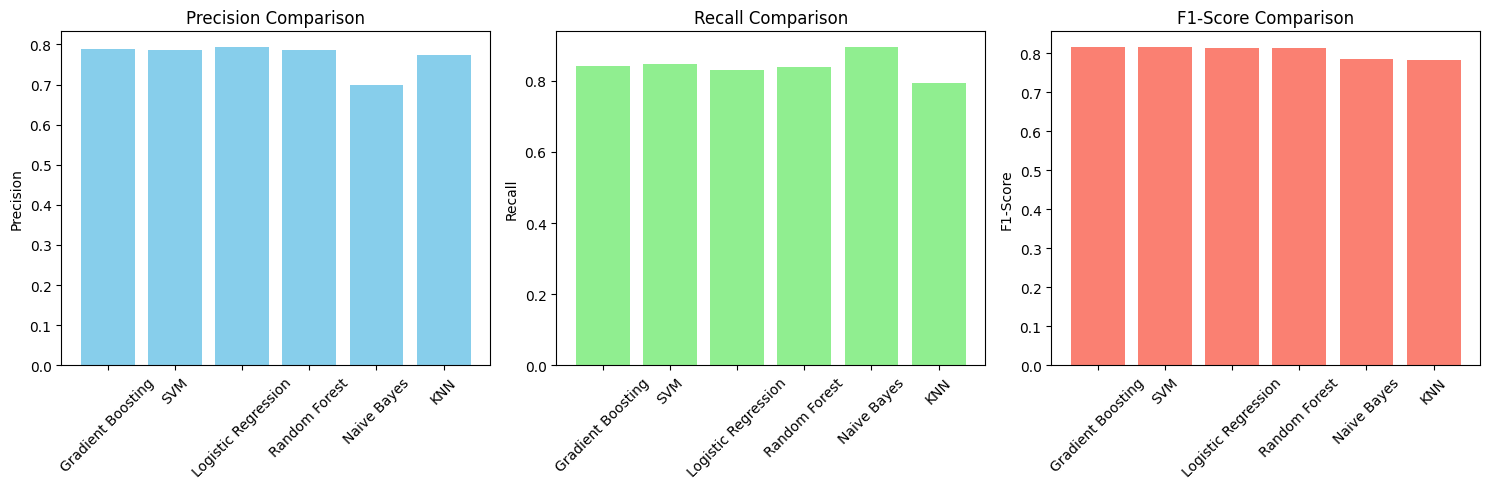

In [8]:
# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Precision comparison
axes[0].bar(results_df['Model'], results_df['Precision'], color='skyblue')
axes[0].set_title('Precision Comparison')
axes[0].set_ylabel('Precision')
axes[0].tick_params(axis='x', rotation=45)

# Recall comparison
axes[1].bar(results_df['Model'], results_df['Recall'], color='lightgreen')
axes[1].set_title('Recall Comparison')
axes[1].set_ylabel('Recall')
axes[1].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[2].bar(results_df['Model'], results_df['F1-Score'], color='salmon')
axes[2].set_title('F1-Score Comparison')
axes[2].set_ylabel('F1-Score')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 9. Summary

In [9]:
print("Analysis Summary:")
print("=" * 50)
print(f"Dataset: {df.shape[0]} samples, {df.shape[1]} features (after dropping Avg_Spend_Last_90)")
print(f"Churn rate: {y.mean():.1%}")
print(f"Models evaluated: {len(base_models)}")
print(f"Best model: {best_model}")
print(f"Best F1-Score: {best_f1:.3f}")
print("\nFinal Results Table:")
print(results_df.to_string(index=False))

Analysis Summary:
Dataset: 7372 samples, 15 features (after dropping Avg_Spend_Last_90)
Churn rate: 57.0%
Models evaluated: 6
Best model: Gradient Boosting
Best F1-Score: 0.815

Final Results Table:
              Model  Precision  Recall  F1-Score
  Gradient Boosting      0.789   0.842     0.815
                SVM      0.785   0.847     0.815
Logistic Regression      0.793   0.831     0.812
      Random Forest      0.786   0.839     0.812
        Naive Bayes      0.700   0.894     0.785
                KNN      0.774   0.793     0.783


In [ ]:
# ANN Model (Optional)
# Function of Batch Normalization and Dropout
# 